## PINNs to solve diffeential equations

### 1. First experiments with easy differential equations
#### 1.1 First order ODE

$$
\begin{equation}
    \frac{dy}{dx} + p(x)\cdot y = f(x)
\end{equation}
$$

\begin{equation}
    x \in [0, 1]
\end{equation}

\begin{equation}
    y(0) = A
\end{equation}


\[
\begin{equation}
    y \approx \mathcal{N}(x)
\end{equation}
\]

Loss function:

\[
\begin{equation}   
    MSE = MSE_f + MSE_u
\end{equation}
\]

where

\[
\begin{equation}
    MSE_f = \frac{1}{N_f} \sum_{i=1}^{N_f} \left(\frac{d \mathcal{N}(x)}{dx}\bigg|_{x = x_i} - f(x_i)\right)^2
\end{equation}
\]

and

\[
\begin{equation}
    MSE_u = \frac{1}{N_u} \sum_{i=1}^{N_u} \left(\mathcal{N}(x_i) - y(x_i)\right)^2
\end{equation}
\]


So what does this mean?
To be able to approximate the solution of a differential equation we'll need to minimize the loss function, which is based on two terms:
1) Differential Equation Loss (integral or sum of the residual (left side term, without any coeffcients) - f(x)). We square root to penalize large errors...
2) Boundary Loss condition: solution must satisfy the boundary conditions!

where does the p(x) go? chatgpt tells:
Regarding the missing term 
"p(x) in the loss function, it's important to note that PINNs do not explicitly incorporate coefficients or parameters from the differential equation into the loss function. Instead, PINNs learn to approximate the solution to the differential equation and implicitly capture the effect of 
p(x) through the training process. By minimizing the loss function during training, the neural network learns to approximate the solution 
y(x) that satisfies the differential equation and boundary conditions, effectively capturing the influence of 
p(x)"

In [25]:
import torch 
import torch.nn as nn
import numpy as np


class Model_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer = nn.Linear(1, 10)
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x):
        layer_out = torch.sigmoid(self.hidden_layer(x))
        output = self.output_layer(layer_out)
        return output
    
model1 = Model_1()

Let's test for those boundary conditions:

\[
\begin{equation}
    \begin{cases}
      f(x) = e^x\\
      p(x) = 0
    \end{cases}\,.
\end{equation}
\]

\[
\begin{equation}
    y(0) = 1
\end{equation}
\]


Here the exact solution is f(x) = e^x, let's implement the loss and train a model!

In [95]:
def f(x):
    return torch.exp(x)

def loss(x):
    x.requires_grad = True #gradients with respect to x should be calculated during backprop
    y = model1(x) #calculate y's for the input x's
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0] #create_graph = True allows for higher degree derivatives
  
    return torch.mean( (dy_dx - f(x))**2 ) + (y[0, 0] - 1.)**2

In [103]:
x = torch.linspace(0, 1, 100)[:, None]

optimizer = torch.optim.LBFGS(model1.parameters())

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()

    return l

epochs = 10
for i in range(epochs):
    optimizer.step(closure)

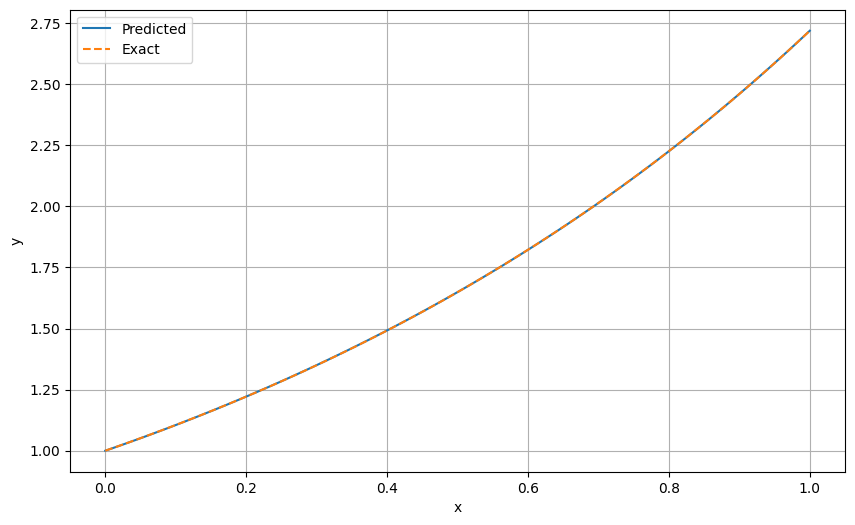

In [70]:
import matplotlib.pyplot as plt

xx = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    yy = model1(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label="Predicted")
plt.plot(xx, torch.exp(xx), '--', label="Exact")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

#### 1.2 Second Order ODE

\begin{equation}
    \frac{d^2 y}{dx^2} + p(x) \frac{dy}{dx} + q(x) y = f(x)
\end{equation}

\begin{equation}
    x \in [0, 1]
\end{equation}

\begin{equation}
    y(0) = A
\end{equation}

\begin{equation}
    y(1) = B
\end{equation}



#### Example Function and BC

\begin{equation}
    \begin{cases}
      p(x) = 0\\
      q(x) = 0\\
      f(x) = -1
    \end{cases}\,.
\end{equation}

\begin{equation}
    \begin{cases}
      y(0) = 0\\
      y(1) = 0
    \end{cases}\,.
\end{equation}


\begin{equation}
    y(x) = - \frac{1}{2}x^2 + \frac{1}{2}x
\end{equation}


In [164]:
class Model_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(1, 12)
        self.output_layer = nn.Linear(12, 1)

    def forward(self, x):
        hidden_layer = torch.sigmoid(self.input_layer(x))
        out = self.output_layer(hidden_layer)

        return out
    
model2 = Model_2()

In [165]:
def f(x):
    return -torch.ones(x.shape[0], x.shape[1])

def loss(x):
    x.requires_grad = True
    y = model2(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph= True)[0] #
    dy_dx_2 =  torch.autograd.grad(dy_dx.sum(), x, create_graph= True)[0]

    return torch.mean( (dy_dx_2 - f(x))**2 ) + 0.5*(y[0, 0] - 0.)**2 + 0.5*(y[-1, 0] - 0.)**2

In [166]:
x = torch.linspace(0, 1, 100)[:, None]

optimizer = torch.optim.LBFGS(model2.parameters())

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()

    return l

epochs = 50
for i in range(epochs):
    optimizer.step(closure)

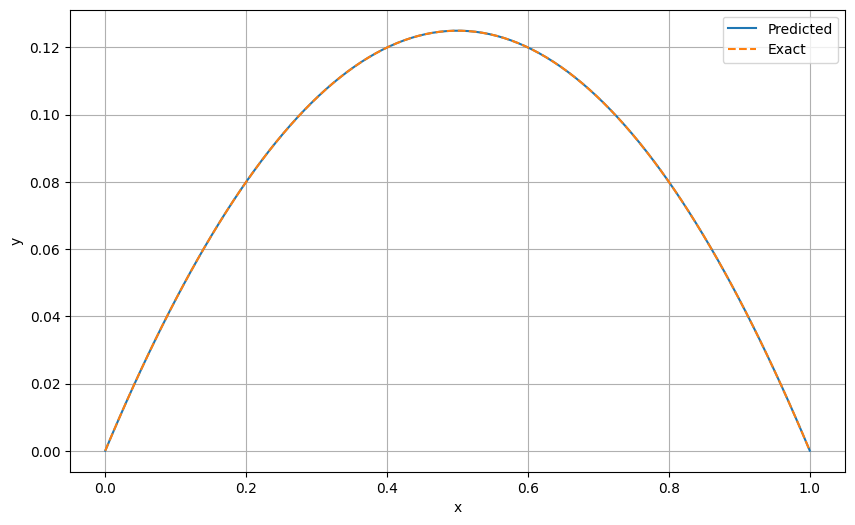

In [167]:
xx = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    yy = model2(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label="Predicted")
plt.plot(xx, -0.5*torch.pow(xx, 2) + 0.5*xx, '--', label="Exact")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

In [2]:
import fenics-ffc

SyntaxError: invalid syntax (210479098.py, line 1)